### For the 2013 season, is there a linear relationship between  how ofter a rider placed in the top 10 and the number of times he stayed on his bull for a full 8 seconds?


In [1]:
!pip install PyDrive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_list = drive.ListFile({'q':" '1VuTTbE_6T9YAe6msIy1TGz7iHmzoBJtB' in parents and trashed=false"}).GetList()
for file in file_list:
  print('title: \%s, id: %s' % (file['title'], file['id']))


title: \lab2.ipynb, id: 1aB9A5kRANxBvXY5IYLhJmTnJjqYPXqdB
title: \BullRiders.csv, id: 1ugRQp7ZyScxVPZI4BwYF5MRKcUIwADyj


In [0]:
data = drive.CreateFile({'id':'1ugRQp7ZyScxVPZI4BwYF5MRKcUIwADyj'})
data.GetContentFile('bullriders.csv')

In [3]:
buldata = pd.read_csv('bullriders.csv')
buldata.head()

,Rider,Rank15,Country,YearBorn,Height,Weight,YearsPro,Events14,BuckOuts14,Rides14,...,BuckOuts12,Rides12,CupPoints12,Rank12,RidePer12,Wins12,Top5_12,Top10_12,FinalPoints12,Earnings12
0,Joao Ricardo Vieira,1,BRA,1984,66,163,3,28,93,41,...,0,0,0.00,0,0.00,0,0,0,0.0,0.00
1,Matt Triplett,2,USA,1991,67,160,4,28,86,33,...,0,0,0.00,0,0.00,0,0,0,0.0,0.00
2,J.B. Mauney,3,USA,1987,70,140,10,22,63,25,...,82,40,9273.25,8,0.49,3,8,13,287.0,313340.27
3,Kaique Pacheco,4,BRA,1994,68,145,2,1,1,0,...,0,0,0.00,0,0.00,0,0,0,0.0,0.00
4,Nathan Schaper,5,USA,1990,73,160,6,15,41,17,...,0,0,0.00,0,0.00,0,0,0,0.0,0.00


In [4]:
# HOW MANY OBSERVATIONS

buldata.shape[0]

58

In [5]:
# HOW MANY OF THE 10 FIRST RIDERS HAVE BEEN PRO FOR 10 YEARS OR MORE

(buldata['YearsPro'][0:11] >= 10).sum()

3

In [6]:
# Of the top 15 riders so far in 2015, how many rides were completed by the rider 
# with the fewest buck-outs in 2014?

print('Rider with fewest buck-outs in 2014 (top 15):')
print(buldata.head(15).iloc[buldata['BuckOuts14'].idxmin(),:].Rider)
print('# of rides')
buldata[ buldata.Rider == 'Kaique Pacheco']['Rides14'].values[0]

Rider with fewest buck-outs in 2014 (top 15):
Kaique Pacheco
# of rides


0

In [7]:
# variables of interest
buldata.dtypes

Rider                  object
Rank15                  int64
Country                object
YearBorn                int64
Height                  int64
Weight                  int64
YearsPro                int64
Events14                int64
BuckOuts14              int64
Rides14                 int64
CupPoints14           float64
Rank14                  int64
RidePer14             float64
RidesPer_45bull_14    float64
Rides90pts_14           int64
Wins14                  int64
Top5_14                 int64
Top10_14                int64
FinalPoints14         float64
Earnings14            float64
Events13                int64
BuckOuts13              int64
Rides13                 int64
CupPoints13           float64
Rank13                  int64
RidePer13             float64
RidesPer_45bull_13    float64
Rides90pts_13           int64
Wins13                  int64
Top5_13                 int64
Top10_13                int64
FinalPoints13         float64
Earnings13            float64
Events12  

In [0]:
# 1. Create a subset of the data which contains only those riders that have participated in 
# at least one event in 2013.

particIn13 = buldata[buldata['Events13'] > 0]

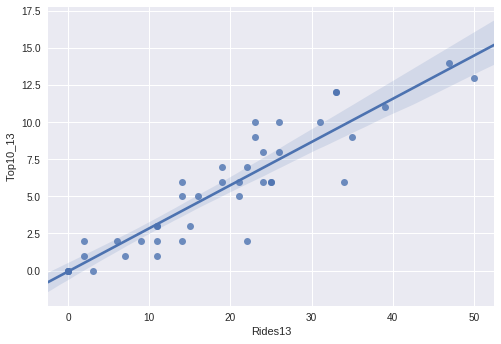

In [9]:
# 2-.Create a scatterplot of the two variables of interest.
# 3. Check to see that the relationship is linear.  Plot a line of best fit as a guide.

sns.regplot(particIn13.Rides13, particIn13.Top10_13)

In [10]:
# 4. If the relationship is linear, calculate the correlation coefficient.

particIn13.Rides13.corr(particIn13.Top10_13)

0.9166059529780409

18.73170731707317
19.0


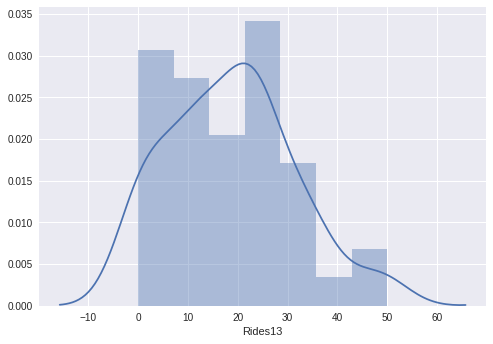

In [11]:
# On average, a bull rider in 2013 has how many rides? (Report the median becuase the histogram is not symmetrical.)
sns.distplot(particIn13.Rides13)
print(particIn13.Rides13.mean())
print(particIn13.Rides13.median())

In [12]:
# These bull riders made it into the Top 10 an average of ________ times in 2013. 

particIn13['Top10_13'].median()

6.0

In [13]:
particIn13[ (particIn13.Top10_13 == 2) & (particIn13.Rides13 == 22) ]

,Rider,Rank15,Country,YearBorn,Height,Weight,YearsPro,Events14,BuckOuts14,Rides14,...,BuckOuts12,Rides12,CupPoints12,Rank12,RidePer12,Wins12,Top5_12,Top10_12,FinalPoints12,Earnings12
4,Nathan Schaper,5,USA,1990,73,160,6,15,41,17,...,0,0,0.0,0,0.0,0,0,0,0.0,0.0


## Dis the Tru Lab
### In 2012, which variable had the strongest linear relationship with Earnings:  Ride Percentage or Cup Points?

In [0]:
particIn12 = buldata[buldata.Events12 > 0]

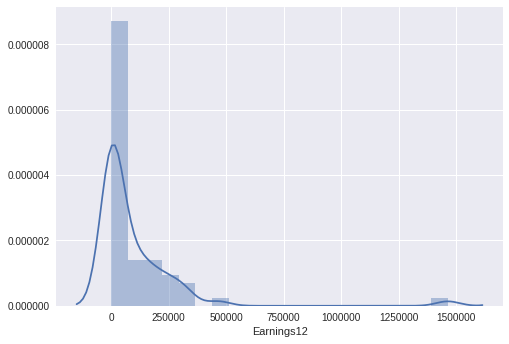

In [15]:
# What is the shape of the Earnings distribution for 2012?

sns.distplot(buldata.Earnings12)

In [16]:
# What was the average amount earned by a bull rider?

particIn12.Earnings12.median()

147952.34

Correlation:  0.5934109564110922


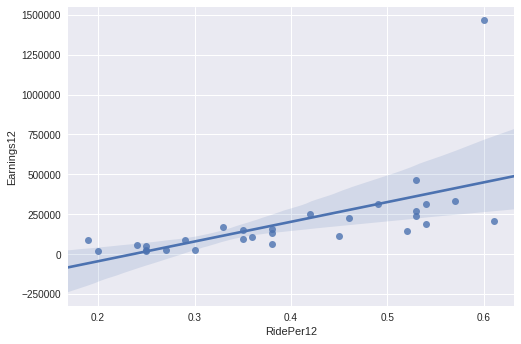

In [17]:
sns.regplot(particIn12.RidePer12, particIn12.Earnings12)
print('Correlation: ',particIn12.RidePer12.corr(particIn12.Earnings12))

Correlation:  0.6569363258733382


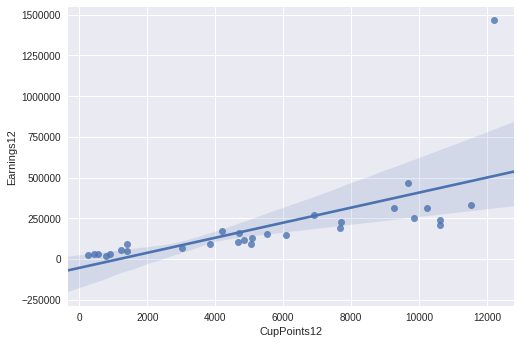

In [18]:
sns.regplot(particIn12.CupPoints12, particIn12.Earnings12)
print('Correlation: ', particIn12.CupPoints12.corr(particIn12.Earnings12))

In [19]:
# the one who earned more in 2012 
particIn12.loc[particIn12.Earnings12.idxmax(),:]

Rider                 Silvano Alves
Rank15                            8
Country                         BRA
YearBorn                       1987
Height                           67
Weight                          150
YearsPro                          7
Events14                         28
BuckOuts14                       92
Rides14                          50
CupPoints14                 9004.06
Rank14                            1
RidePer14                    0.5435
RidesPer_45bull_14           0.3333
Rides90pts_14                     1
Wins14                            0
Top5_14                           7
Top10_14                         12
FinalPoints14                  3607
Earnings14               1.4226e+06
Events13                         27
BuckOuts13                       91
Rides13                          50
CupPoints13                 10937.8
Rank13                            2
RidePer13                    0.5495
RidesPer_45bull_13              0.2
Rides90pts_13               

In [0]:
# removing the previous outlier
particIn12 = particIn12.drop(particIn12.Earnings12.idxmax())

New Correlation:  0.8035573600823024


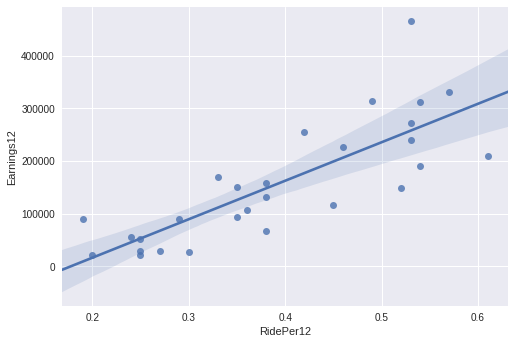

In [21]:
sns.regplot(particIn12.RidePer12, particIn12.Earnings12)
print('New Correlation: ',particIn12.RidePer12.corr(particIn12.Earnings12))

New Correlation:  0.8929207859056748


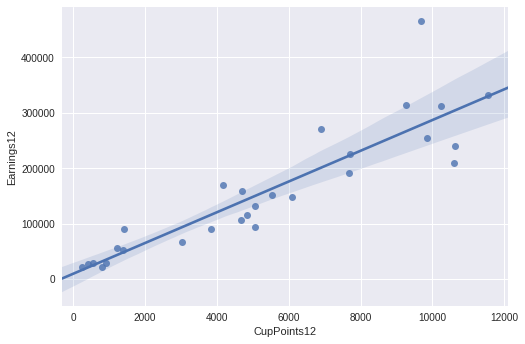

In [22]:
sns.regplot(particIn12.CupPoints12, particIn12.Earnings12)
print('New Correlation: ', particIn12.CupPoints12.corr(particIn12.Earnings12))

### Problem Set

In [0]:
# riders with at least one ride in 2014
rideIn14 = buldata[buldata.Rides14 > 0]

In [0]:
# average of rides per event for riders in 2014
ridesPerEvent14 = rideIn14.Rides14 / rideIn14.Events14

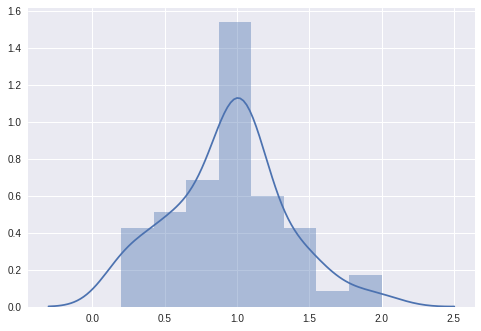

In [25]:
sns.distplot(ridesPerEvent14)

In [26]:
print('Max: ',ridesPerEvent14.max())
print('Min: ',ridesPerEvent14.min())
print('Median: ',ridesPerEvent14.median())

Max:  2.0
Min:  0.2
Median:  1.0


Correlation:  -0.49451525363696375


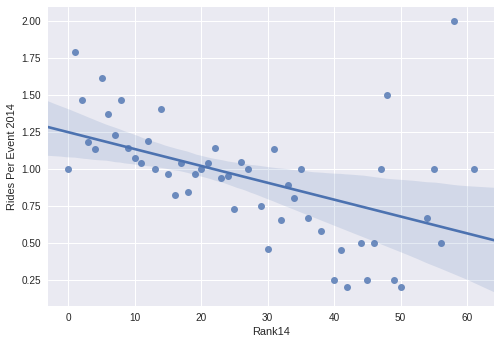

In [27]:
sns.regplot(rideIn14.Rank14, ridesPerEvent14).set(ylabel='Rides Per Event 2014')
print('Correlation: ', rideIn14.Rank14.corr(ridesPerEvent14))

In [0]:
p2 = {
    'MinStudying': [
        30,
        45,
        180,
        95,
        130,
        140,
        30,
        80,
        60,
        110,
        0,
        80], 
    'examScore':[
        64,
        68,
        87,
        90,
        94,
        84,
        92,
        88,
        82,
        93,
        65,
        90]
}

p2df = pd.DataFrame(data=p2)

In [30]:
p2df.MinStudying.corr(p2df.examScore)

0.6097055820038043

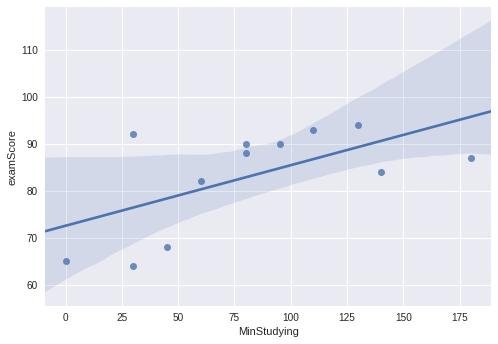

In [32]:
sns.regplot(p2df.MinStudying, p2df.examScore)

In [0]:
outlier = p2df[(p2df.MinStudying == 30) & (p2df.examScore == 92)]
p2df.drop(outlier.index[0], inplace=True)

In [40]:
p2df.MinStudying.corr(p2df.examScore)

0.7484742873656346

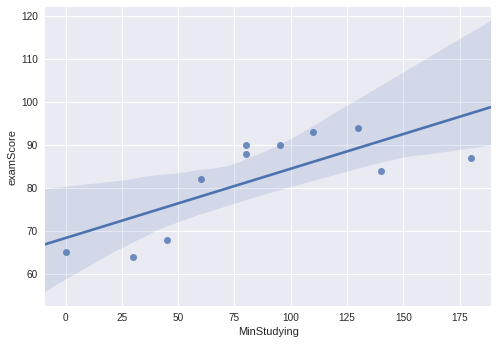

In [39]:
sns.regplot(p2df.MinStudying, p2df.examScore)